In [11]:
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
sns.set() # for plot styling
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

In [13]:
# importing dataset
data = pd.read_csv('movie_metadata.csv')
data.shape
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [17]:
newdata = data.iloc[:,4:6]
newdata

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
4,131.0,NaN
...,...,...
5038,2.0,318.0
5039,NaN,319.0
5040,0.0,0.0
5041,0.0,489.0


In [18]:
newdata = newdata.dropna()
newdata

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
5,475.0,530.0
...,...,...
5037,0.0,133.0
5038,2.0,318.0
5040,0.0,0.0
5041,0.0,489.0


## Build model

In [19]:
from sklearn.cluster import KMeans

In [20]:
model = KMeans(n_clusters=5)

In [21]:
model.fit(newdata)

KMeans(n_clusters=5)

In [23]:
model.cluster_centers_

array([[  153.94452806,   424.19264674],
       [12441.17647059,   604.34313725],
       [  210.77011494, 11126.43678161],
       [17545.45454545, 14545.45454545],
       [17544.11764706,   598.77941176]])

In [24]:
print(model.labels_)
print(len(model.labels_))

[0 0 0 ... 0 0 0]
4919


In [25]:
print(type(model.labels_))
unique, counts = np.unique(model.labels_, return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 4651, 1: 102, 2: 87, 3: 11, 4: 68}


/home/sannhtet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/sannhtet/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


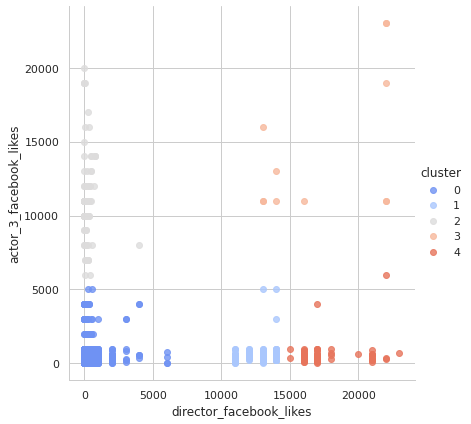

In [27]:
# Plot the data
newdata['cluster'] = model.labels_
sns.set_style('whitegrid')
sns.lmplot('director_facebook_likes', 'actor_3_facebook_likes', data=newdata, hue='cluster',
          palette='coolwarm', size=6, aspect=1, fit_reg=False)